In [ ]:
using DrWatson
@quickactivate "APLG";
include(srcdir("phase_diag.jl"));
using PyPlot, LaTeXStrings



In [2]:
function plt_eigens!(ax,ϕ, ϕa, v0,ax_lims,font; inc = 0.5)
    ws = collect(0.00:0.001:10)

    λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:red", label = L"\mathrm{Re} \lambda_1")

    λs = relambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:blue", label = L"\mathrm{Re} \lambda_2")

    λs = relambw3.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:green",label = L"\mathrm{Re} \lambda_3")

    λs = imlambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:purple", linestyle = "--", label = L"\mathrm{Im} \lambda_1")

    λs = imlambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:orange", linestyle = "--", label = L"\mathrm{Im} \lambda_2")

    λs = imlambw3.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:cyan",linestyle = "--", label = L"\mathrm{Im} \lambda_3")
    

    ax.set_xlabel(L"\omega",fontsize=font)
    # ax.set_ylabel(L"\phi_p", fontsize=font)
    ax.yaxis.set_ticks(ax_lims[3]:inc:ax_lims[4])
    ax.xaxis.set_ticks(ax_lims[1]:1:ax_lims[2])
    ax.tick_params(direction = "in", labelsize = font)
    ax.axis(ax_lims)
end

plt_eigens! (generic function with 1 method)

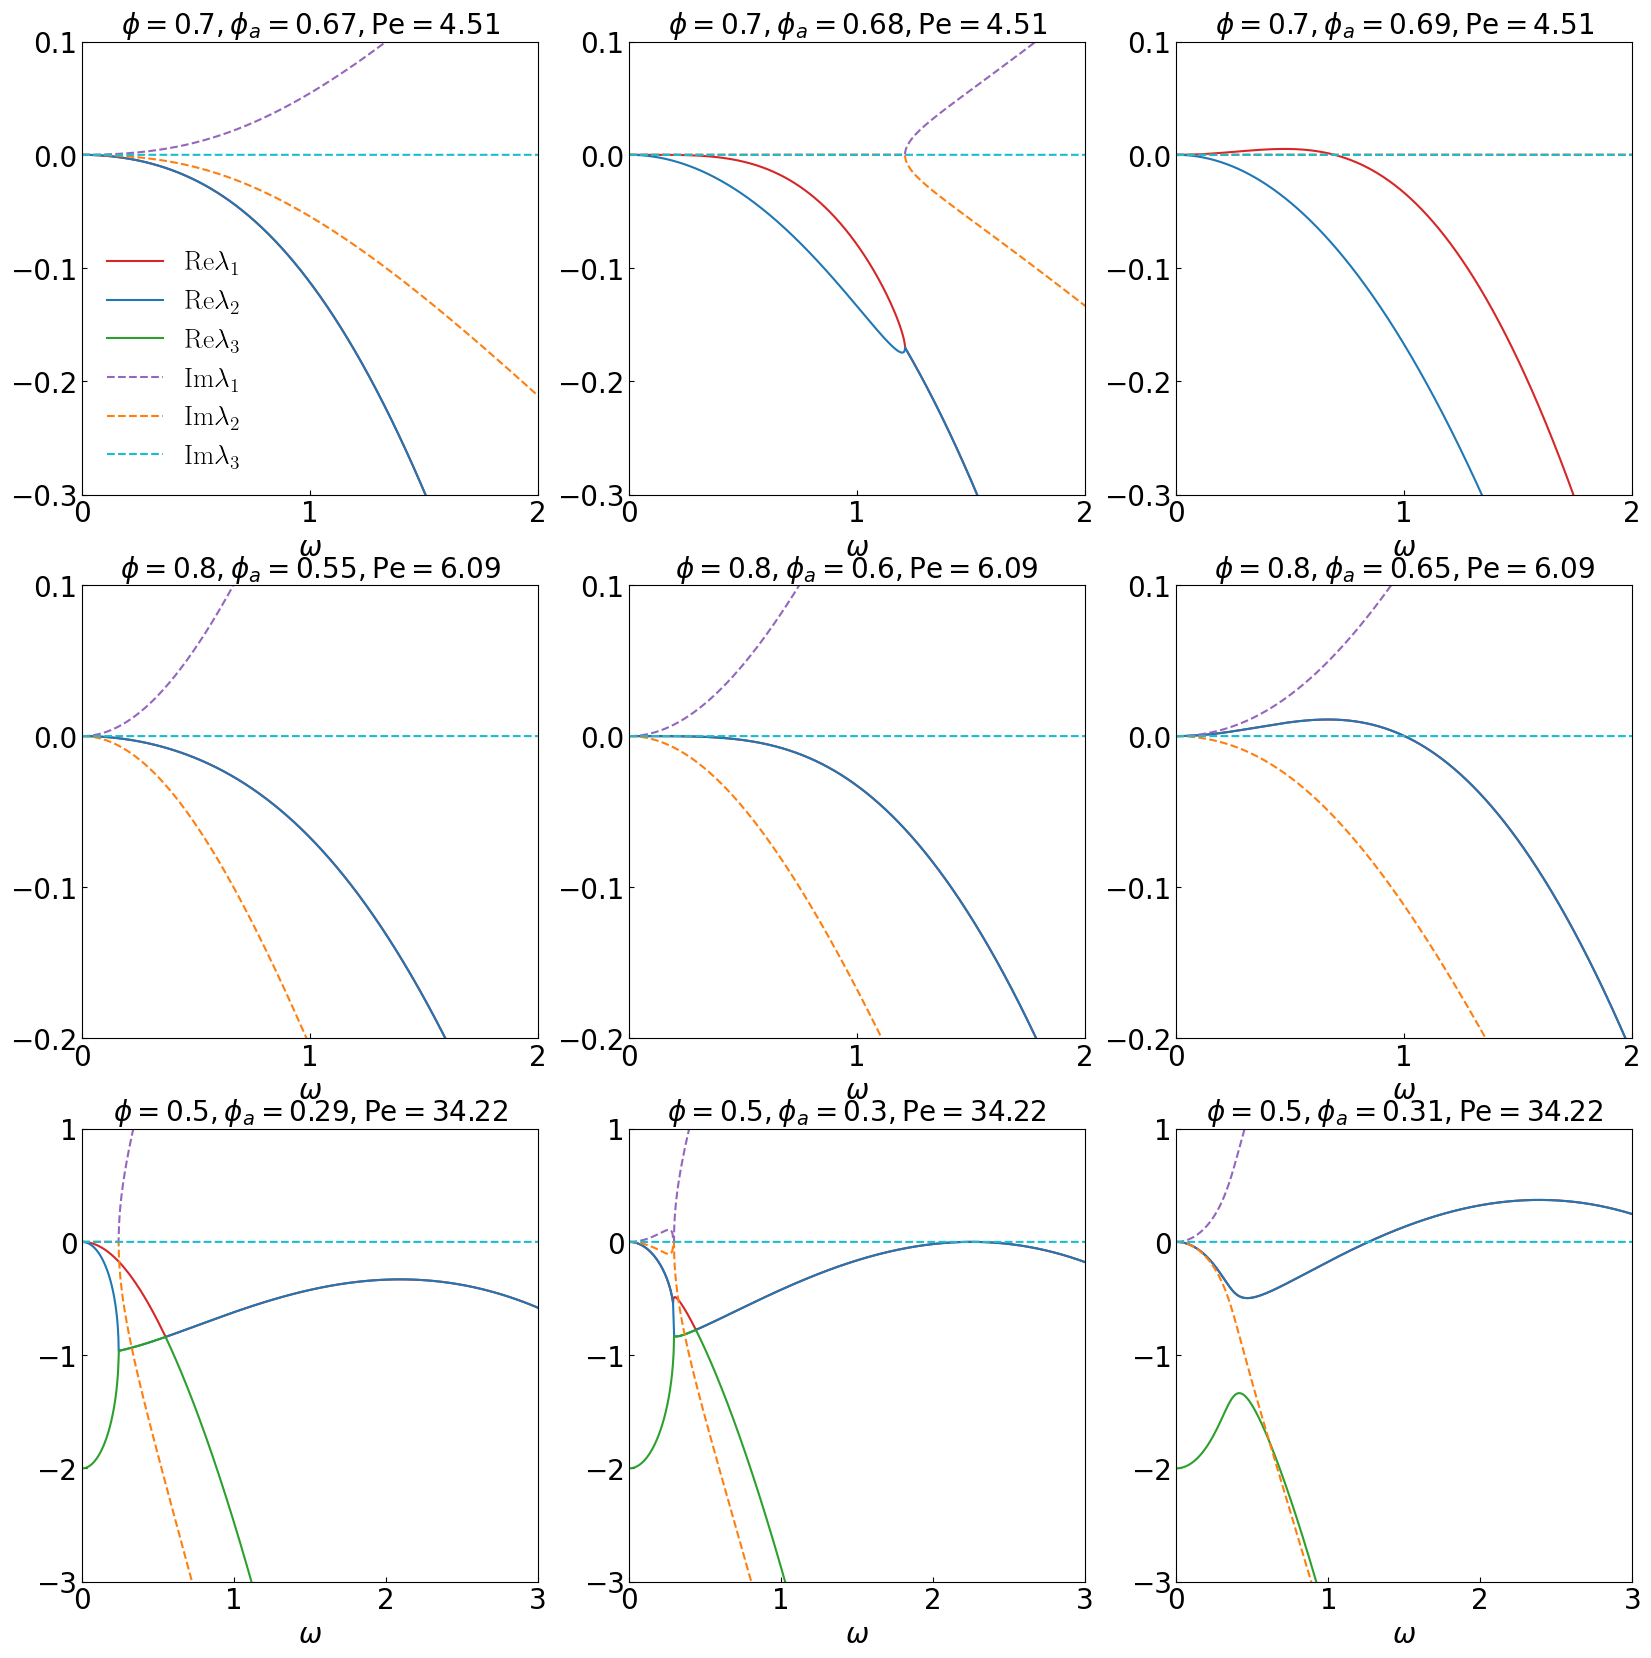

PyObject <matplotlib.legend.Legend object at 0x325825160>

In [3]:
lims = [[0,2,-.3,.1] ,[0,2,-.3,.1],[0,2,-.3,.1],
        [0,2,-.2,.1],[0,2,-.2,.1],[0,2,-.2,.1],
        [0,3,-3,1],[0,3,-3,1],[0,3,-3,1]
        ]
ϕs = [0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.5, 0.5,0.5]
ϕas  = [0.67, 0.68, 0.69, 0.55, 0.6, 0.65, 0.29, 0.3, 0.31]
vs  = [4.51, 4.51, 4.51, 6.09,6.09,6.09,34.22,34.22,34.22]
incs = [0.1,0.1,0.1,0.1,0.1,0.1,1,1,1]

font = 20
fig, axs = subplots(3,3,figsize=(20, 20))
axs = reshape(axs, (3,3))  # Ensure it's a 2D array
axs = permutedims(axs)     # Transpose the array to get row-major order
rc("text", usetex=true)

for (i,(ax,ϕa,ϕ,v0,ax_lims,inc)) in enumerate(zip(axs,ϕas,ϕs,vs,lims,incs))
    if i ==1
        ws = collect(0.00:0.001:10)

        λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
        ax.plot(ws,λs; color="tab:red", label = L"\mathrm{Re} \lambda_1")
    
        λs = relambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
        ax.plot(ws,λs; color="tab:blue", label = L"\mathrm{Re} \lambda_2")
    
        λs = relambw3.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
        ax.plot(ws,λs; color="tab:green",label = L"\mathrm{Re} \lambda_3")
    
        λs = imlambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
        ax.plot(ws,λs; color="tab:purple", linestyle = "--", label = L"\mathrm{Im} \lambda_1")
    
        λs = imlambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
        ax.plot(ws,λs; color="tab:orange", linestyle = "--", label = L"\mathrm{Im} \lambda_2")
    
        λs = imlambw3.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
        ax.plot(ws,λs; color="tab:cyan",linestyle = "--", label = L"\mathrm{Im} \lambda_3")
        
    
    ax.set_xlabel(L"\omega",fontsize=font)
    ax.yaxis.set_ticks(ax_lims[3]:inc:ax_lims[4])
    ax.xaxis.set_ticks(ax_lims[1]:1:ax_lims[2])
    ax.tick_params(direction = "in", labelsize = font)
    ax.axis(ax_lims)
    
    latex_string = latexstring("\$ \\phi = $(ϕ), \\phi_a = $(ϕa), \\mathrm{Pe} = $(v0) \$")
    ax.set_title(latex_string, fontsize=font)
    else
        plt_eigens!(ax,ϕ, ϕa, v0,ax_lims,font; inc=inc)
        latex_string = latexstring("\$ \\phi = $(ϕ), \\phi_a = $(ϕa), \\mathrm{Pe} = $(v0) \$")
        ax.set_title(latex_string, fontsize=font)
    end
end

axs[1].legend(edgecolor = "white", fontsize=font)